# PROJEK AKHIR KB C1-20 
# **TEMA     : KLASIFIKASI GENDER**
---
# **KELOMPOK : 5 A2**
1.   **2009106 LIDYA SIMANUNGKALIT** (JOB)
2.   **20091060 RENA INDAH CHOINURISSA** (JOB)
3.   **20091060 ARYA NANDA** (JOB)

# **ABOUT DATASET**
bla bla bla

Dataset berisi gambar lemon berkualitas buruk dan baik di bawah kondisi pencahayaan yang sedikit berbeda (semua di bawah sinar matahari).

# **ABOUT PROJECT**
Project ini mendeteksi bla bla bla

# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout , GlobalAveragePooling2D

In [2]:
train = "Dataset/Train"
test = "Dataset/Test"
valid = "Dataset/Validation"

# DATA PROCESSING

In [3]:
train_gen = ImageDataGenerator(
    rescale=1./255.0)
test_gen = ImageDataGenerator(
    rescale=1./255.0)
valid_gen = ImageDataGenerator(
    rescale=1./255.0)


In [4]:
train_ds = train_gen.flow_from_directory(
    train,target_size=(224,224),batch_size=128, class_mode='binary')
test_ds = test_gen.flow_from_directory(
    test,target_size=(224,224),batch_size=128, class_mode='binary')
valid_ds = valid_gen.flow_from_directory(
    valid,target_size=(224,224),batch_size=128, class_mode='binary')

Found 31480 images belonging to 2 classes.
Found 10190 images belonging to 2 classes.
Found 16478 images belonging to 2 classes.


# VISUALISASI

In [5]:
def plot_data(ds,batch_num,image_num):
    plt.imshow(ds[batch_num][0][image_num])
    name = np.argmax(ds[batch_num][1][image_num])
    plt.xlabel(list(train_ds.class_indices)[name])


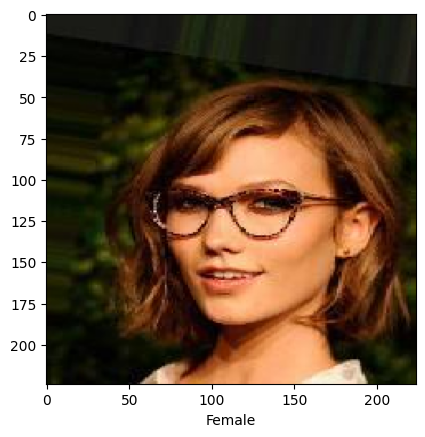

In [6]:
plot_data(train_ds,1,1)

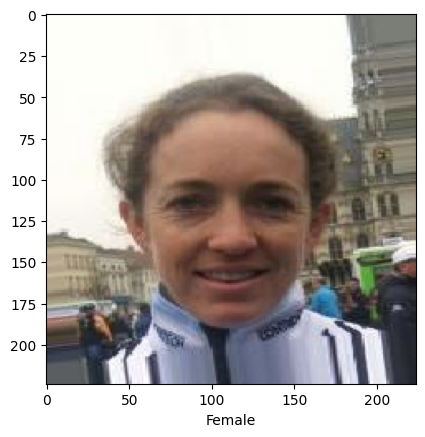

In [7]:
plot_data(test_ds,2,2)

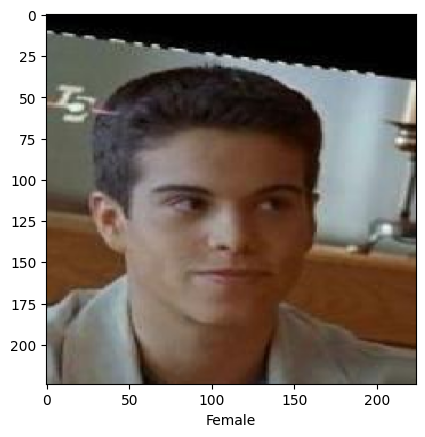

In [8]:
plot_data(valid_ds,2,30)

# MODELING

In [9]:
model = Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=[224,224,3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 197136)            0         
                                                                 
 dense (Dense)               (None, 128)               25233536  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 25,234,113
Trainable params: 25,234,113
Non-trainable params: 0
____________________________________________

In [12]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])                                                                                                                           

In [13]:
history = model.fit(train_ds,epochs=20,validation_data=valid_ds, steps_per_epoch=15)

Epoch 1/20
15/15 [==============================] - 275s 19s/step - loss: 9.3954 - accuracy: 0.5250 - val_loss: 4.2103 - val_accuracy: 0.4002
Epoch 2/20
15/15 [==============================] - 195s 13s/step - loss: 2.4958 - accuracy: 0.5521 - val_loss: 0.6786 - val_accuracy: 0.7056
Epoch 3/20
15/15 [==============================] - 172s 12s/step - loss: 0.7810 - accuracy: 0.6604 - val_loss: 0.5428 - val_accuracy: 0.7426
Epoch 4/20
15/15 [==============================] - 175s 12s/step - loss: 0.5152 - accuracy: 0.7620 - val_loss: 0.4643 - val_accuracy: 0.7969
Epoch 5/20
15/15 [==============================] - 164s 11s/step - loss: 0.4352 - accuracy: 0.8156 - val_loss: 0.4132 - val_accuracy: 0.8232
Epoch 6/20
15/15 [==============================] - 154s 10s/step - loss: 0.3534 - accuracy: 0.8661 - val_loss: 0.3255 - val_accuracy: 0.8707
Epoch 7/20
15/15 [==============================] - 161s 11s/step - loss: 0.2901 - accuracy: 0.8911 - val_loss: 0.3056 - val_accuracy: 0.8803
Epoch 

# EVALUATE MODEL

In [14]:
model_evaluate = model.evaluate(test_ds)
print(model_evaluate[0])
print(model_evaluate[1])

80/80 [==============================] - 95s 1s/step - loss: 0.1638 - accuracy: 0.9377
0.16376443207263947
0.9376839995384216


# PERTUMBUHAN AKURASI

In [15]:
#train
y_acc_train = history.history['accuracy']
y_acc_val = history.history['val_accuracy']

#validation
y_loss_train = history.history['loss']
y_loss_val = history.history['val_loss']

#epoch
x_ = range(len(y_acc_train))

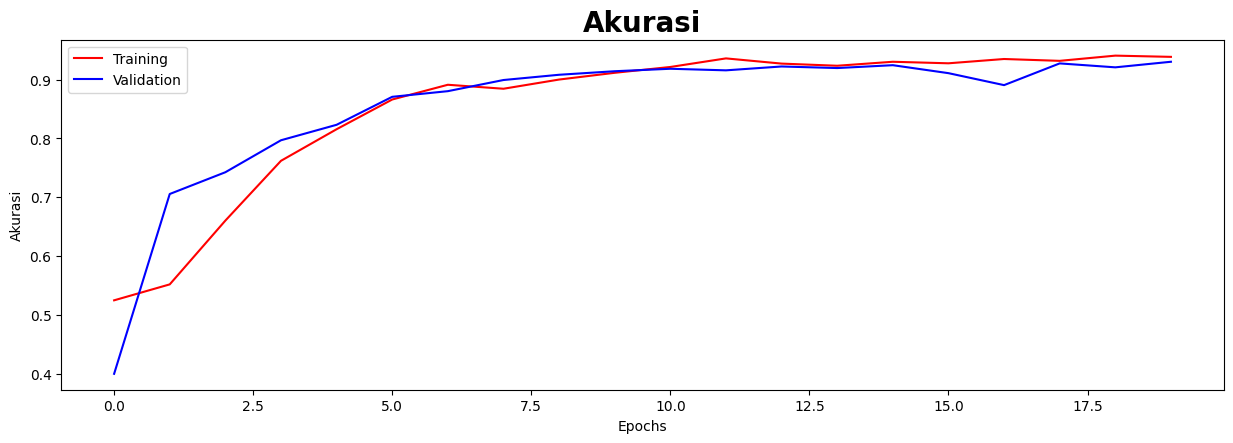

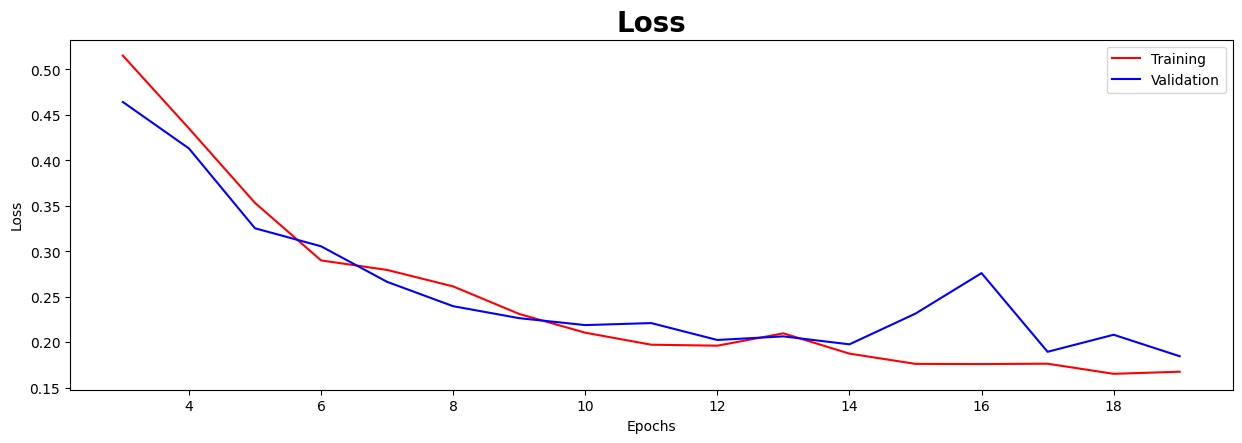

In [16]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(x_, y_acc_train, c='r', label='Training')
plt.plot(x_, y_acc_val, c='b', label='Validation')
plt.title('Akurasi',fontsize=20,fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
plt.plot(x_[3:], y_loss_train[3:], c='r', label='Training')
plt.plot(x_[3:], y_loss_val[3:], c='b', label='Validation')
plt.title('Loss',fontsize=20,fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# PREDIKSI

In [17]:
model.predict(test_ds)

80/80 [==============================] - 55s 674ms/step


array([[2.6359276e-03],
       [9.4733131e-01],
       [7.6345795e-01],
       ...,
       [2.5409639e-05],
       [2.5691420e-02],
       [9.5480405e-02]], dtype=float32)

# MENAMPILKAN GAMBAR HASIL PREDIKSI

In [22]:
class_names = ['female','male']

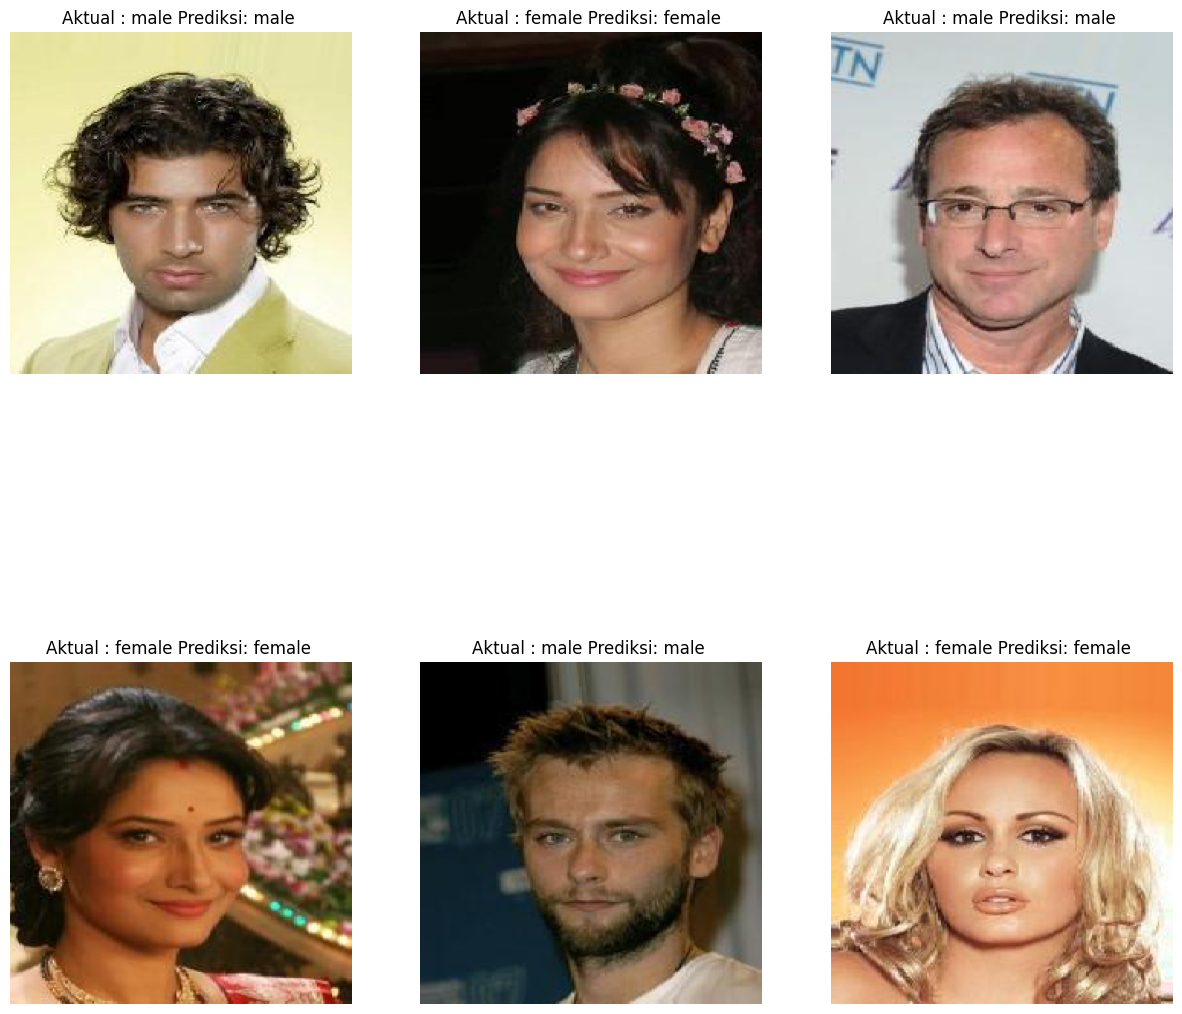

In [24]:
img, labels = test_ds.next()
plt.figure(figsize=(15,15))
for i in range(6):
    predictions = model.predict(tf.expand_dims(img[i], 0),verbose=0)

    plt.subplot(2,3,i+1)

    hasil = 0
    if (predictions > 0.5):
      hasil = 1

    temp = tf.cast(labels[i], dtype=tf.int32) #mengubah float jadi int. indeks tdk bisa float

    plt.title(f'Aktual : {class_names[temp]} Prediksi: {class_names[hasil]} ')
    plt.grid('off')
    plt.axis('off')
    plt.imshow(img[i]);

In [23]:
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=[224,224])
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.cast(img_array, dtype=tf.float32) / tf.constant(256, dtype=tf.float32)
    img_array = tf.expand_dims(img_array, 0)


    hasil = 0
    predictions = model.predict(img_array)
    if (predictions > 0.5):
        hasil = 1
    elif (predictions < 0.5):
        hasil = 0
    print(f'label : {class_names[hasil]}')
    plt.grid('off')
    plt.axis('off')
    plt.imshow(img);

1/1 [==============================] - 0s 201ms/step
label : female


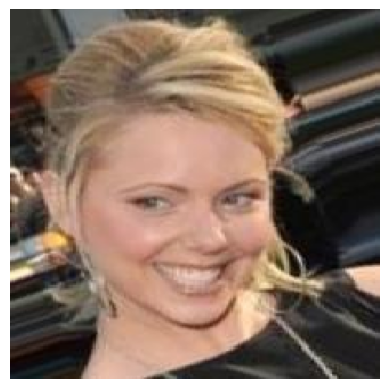

In [20]:
predict_image('Dataset/test/female/170000.jpg')

1/1 [==============================] - 0s 32ms/step
label : male


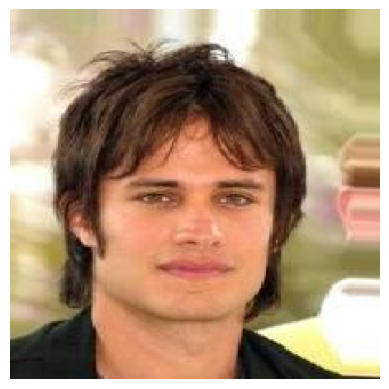

In [21]:
predict_image('Dataset/test/male/169505.jpg')